# Project 1: Assembling Genomes


   <div class="alert alert-block alert-danger">
    <center>Due: <b>Tuesday, 8 February, 4:59pm</b>.</center> 
   </div>
   
   <div class="alert alert-block alert-warning">
   <center>
       <b>Collaboration and Resource Policy</b>
    </center>
    For this assignment, you are encouraged to work with one other person. Your team must satisfy the constraints mentioned in <a href="https://www.dropbox.com/s/g6z2xncwc4jsplp/csbio-class2-inked.pdf?dl=0">Class 2</a>.
    
   1. You went to different high schools.
   2. You and your partner have different answers to <em>at least one</em> of these questions:
       - What country were you born in?
       - Have you taken any biology courses at UVA?
       - Have you taken cs3102?
       - Have you taken cs4102?
    
We expect most students will have the best learning experience on this assignment by working with a partner, but if you prefer to work alone it is okay to do this assignment on your own.
    
You are permitted (actually _encouraged_) to discuss these problems with anyone you want, including other students in the class. If you do discuss the specific questions in the assignment with anyone other than your assignment partner and the course staff, though, you should list them in the _External resources used_ section below.
    
You are welcome to use any resources you want for this assignment, other than ones that would defeat the purpose of the assignment. This means you should not look at answers or code from any other students in the class (other than your collaboration with your partner), and if you find code that implements the problem you are being asked to do for the assignment, you should not use that code. You should document all external resource you use that are not part of the course materials in the _External resources used_ section below.

**Team submitting this assignment:**  
<div class="alert alert-success">
    <b><em>Natalie Zhang (nyz7tc), Sion Kim (sk9uth)</em></b>
    
</div>

**External resources used:** 
<div class="alert alert-success">
<em>https://www.geeksforgeeks.org/python-get-all-substrings-of-given-string/</em>
    <em>https://www.geeksforgeeks.org/fleurys-algorithm-for-printing-eulerian-path/</em>
</div>

In this project, we will explore genome assembly — the process of determining the order of nucleotides from fragmented reads that are produced by sequencing machines. 

Genome assembly maps to a very well defined computer science problem, but can get quite complicated, as problems such as full sequence coverage, finding a good length for reads (the $k$ in $k$-mer), and sequencing errors present challenges for sequencing analysis and accuracy. For the required problems (ones everyone is expected to solve), you will be able to assume perfect coverage and no read errors; for the "challenge" problem (that is considered a bonus, and not something we expect everyone to be able to solve, and perhaps may not even be feasible for anyone to solve) you will not be able to rely on such assumptions.

 <div class="alert alert-block alert-warning">
    
<b>Submission</b>: You should work on this assignment by forking the provided Project 1 repository (you probably already did this, following the instructions posted at [https://computingbiology.github.io/project1](https://computingbiology.github.io/project1). Add the other teammate to as a collaborator with write access (also under the Settings tab) to this repository.
    
You should answer the questions and write your code in this Jupyter Notebook. (We don't expect you to need to use any external files or organize your code outside of the notebook, but if you do, make sure to put everything needed to run your code in your repository.) Parts where you are expected to provide and answer (which could be text that can be written in markdown format in the notebook or Python code that runs in the notebook) are marked in green.
        
When you are ready to submit the assignment, you should create a release of the version you are submitting ([github's directions for how to create a release](https://docs.github.com/en/repositories/releasing-projects-on-github/managing-releases-in-a-repository)) tagged as `submit`. After you've done this, send a message in slack to a channel that includes both team members (so the one sending this message should include the other team member) and all of the course staff (`dave`, `Hyun Jae Cho`, and `Anshuman Suri`) and a link to your repository (feel free to add any other useful comments if you want, but the link to your submission repository is sufficient).

## Getting Started

1. Install basic required packages, should be run only once. You may need to restart the jupyter python kernel (under the Kernel menu) after this. (You can execute this directly in the notebook but running the command below.)

In [1]:
%pip install -r requirements.txt

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/opt/homebrew/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


2. Make sure you have [graphviz](https://graphviz.org/) installed on your system. (On a Mac OS X, `brew install graphviz`. For other platforms, see [_https://graphviz.org/download/_](https://graphviz.org/download/).)

In [2]:
import collections
import matplotlib.pyplot as plt

import utils

## Part 1: Assembling the TeleTubby Genome

For this part, you're given reads generated while trying to sequence the DNA of a mysterious unknown organism with a _tiny_ genome. Some of the course staff is not sure what a TeleTubby is, but I've been assured that no cute creatures were harmed in producing this data (which was generated synthetically).

By answering the following questions, you will learn how to assemble the original genome sequence from sequence reads.

Sequencing data is often stored in the FASTQ file format, with is a simple ASCII format that is somewhat human-readable. 

In _TeleTubby.fastq_ (which is included in the repository you forked), you will find the data that was read from the TeleTubby genome. Each four lines of the file repeat the same pattern. For example,
```
@TeleTubby Genome: Project 1
TAAAATGG
+
HAICDF5I
```
The first line contains the metadata that encodes the name of the read, the experiment type, the kind of sequencing machine used, etc. 

The second line is the sequence of bases that was read. 

The third line is just a placeholder.

The fourth line is a sequence of base qualities that encodes the qualities for the corresponding bases in the sequence line. We will discuss and use this for Problem 2.

Read in the data from `TeleTubby.fastq`:

In [3]:
# Read sequence reads (error-free) from file
sequence_reads, qualities = utils.read_fastq('TeleTubby.fastq')
#print(sequence_reads)
#print(qualities)

### Melting Temperature

The GC-content (or the ratio of G and C nucleotides) is related to the melting temperature of a DNA double helix structure. 

The following equation can be used to estimate the melting temperature (in degrees Celsius) of DNA for a particular sequence:

\begin{equation*}
t_m = 64.9+0.41(\%GC)-\frac{500}{\text{length of sequence}}
\end{equation*}

As a reference, the human genome is known to have between 35%-60% GC-content. 

<div class="alert alert-success">

**Problem 1.** Calculate the melting temperature for the TeleTubby genome using the formula above. Assume that the sequence is 200 nucleotides long, and that the provided read data has equal coverage everywhere so the G-C distribution in the reads is very close to the actual G-C distribution for the genome. 
    </div>

In [4]:
# Write code here for calculating the %GC content from the sequence_reads, and computing the estimated melting temperature.
total_GC = 0
total = 0
for base in sequence_reads:
    for c in base:
        if c == 'C': total_GC +=1
        if c == 'G': total_GC +=1
        total+=1
GC = total_GC / total * 100
print("%GC: " + str(GC))


%GC: 49.87244897959184


In [5]:
# Print out temperature in Celsius
length_sequence = 200
tm = 64.9 + .41*GC - 500/length_sequence
print("melting temp in Celsius: " + str(tm))

melting temp in Celsius: 82.84770408163266


## Interpreting Read Quality

Phred33 quality scores are represented as the character with an ASCII code equal to its value + 33 (to make them easy to print alongside genome sequences). The Phred scores $Q$ are related to error probabilities $P$ as: $Q = -10 \log_{10}(P)$. The table linked here provides a mapping from the Phred values provided in a fastq file and the $Q$ values: [Quality Score Encoding](https://support.illumina.com/help/BaseSpace_OLH_009008/Content/Source/Informatics/BS/QualityScoreEncoding_swBS.htm) 

<div class="alert alert-success">
    
**Problem 2.** Using the Phred scores, identify the _least likely to be correct_ read in the TeleTubby.fastq data, which is the read with the lowest probability that it contains _no_ errors.

</div>

In [6]:
# Write your code for Problem 2 here. 
# It should output the read (nucleotide sequence) with the lowest probability of containing no errors.
max_seq = sequence_reads[0]
count=0
curr_Q = 0
for c in max_seq:
    curr_Q += ord(c)-33
max_P = 10 ** (curr_Q * -10)

for q_base in qualities:
    curr_Q = 0
    
    for c in q_base:
        curr_Q += ord(c)-33
    curr_P = 10 ** (curr_Q/(-10))

    if curr_P > max_P: 
        max_P = curr_P
        max_seq = sequence_reads[count]
    count+=1
print("Sequence with biggest P : " + max_seq)
print("max P: " + str(max_P))

Sequence with biggest P : ATCCCCCG
max P: 2.511886431509572e-22


Note: For the following problems, you can ignore the read quality scores, and safely assume there are no actual errors in the provided TeleTubby reads.

## Frequency analysis

Looking at repetitions in the sequence can be helpful in estimating the "redudancy" in the organisms. Eucaryote genomes have a lot of redundancy, while smaller organisms like bacteria have highly packed genomes. One heuristic to estimate this before actually performing the assembly could be looking at how often certain $k$-mers are repeated.

<div class="alert alert-success">
    
**Problem 3.**
    Print out the 3 most frequent <em>k</em>-mers in the TeleTubby reads with their frequencies. (As in Problem 1, doing this from the reads only produces the same result as from the genome if the read coverage is equal everywhere, but it should be a close estimate.)
</div>

In [7]:
# Your code here
dict_kmers = {}
for base in sequence_reads:
    i = 0
    if base in dict_kmers: dict_kmers[base]+=1
    else: dict_kmers[base] = 1
kmers_list = [(k,v) for k,v in dict_kmers.items()]
kmers_list.sort(key=lambda x: x[1], reverse=True)
print("Most common k-mers are: " + kmers_list[0][0] + ", " + kmers_list[1][0] + ", " + kmers_list[2][0])
        

Most common k-mers are: ATAAAATG, GTGATAGG, TAATTTTT


## Greedy Assembly

Given a set of sequence fragments, the objective of assembly can be viewed as finding the shortest sequence that contains all the fragments.

One of the approaches to assemble the genome from the given reads is a greedy algorithm:

```
while (len(fragments) > 1):
   calculate pairwise alignments of all pairs of fragments
   merge the two fragments with the largest overlap
genome = fragment[0] # the single remaining fragment is the genome
```


# <div class="alert alert-success">
    
**Problem 4 (a)**. What would the runtime be of this algorithm, given $n$ $k$-mer reads? (If you are not sure how to express your answer to this question, review [_Cost of Computation_](https://computingbiology.github.io/complexity/).)
    </div>

<i>Answer</i>: O(N from looping fragments * N from calculating pairwise alignments) = O(N^2)

<div class="alert alert-success">

**Problem 4 (b)**. Is this algorithm guaranteed to find the correct genome? (A good answer will define what _correct_ means here, and explain why the algorithm is or is not guaranteed to find it.)

<i>Answer</i>: We assume that there is perfect coverage. If we define a correct genome in an algorithmic sense, where it is the shortest common superstring (sequence) that can be assembled from all of the fragments if possible, it will always find the correct genome. However, if we define a correct genome to be its matching sequence in nature, it might not be true since it is not guaranteed that the shortest common sequence is the one found the nature and that the overlapping pairs found are actually the ones next to each other in the actual sequence.

## Graph-based Assembly

Graphs for genome assembly can be constructed in two ways:

- de Bruijn graph: Processing $k-$mers as nodes, with $(k-1)-$mers as edges, and
- Overlap graph: Processing $k-$mers as edges, with $(k-1)-$mers as nodes.

A de Bruijn graph can be processed to find Euler paths, while Overlap graphs can be processed to find Hamiltonian paths. Both of these methods can be used reconstruct the original genome.

<div class="alert alert-success">
    
**Problem 5.**  Use one of these two techniques to reconstruct the TeleTubby genome from the provided sequence reads. 
    
</div>
    
We have provided some template code below that may be helpful (but feel free to ignore this is you prefer).

In [270]:
# Read reads into graph

def build_graph(k_mers):
    edges = set()
    nodes = set()
    # Your code here
    # Create nodes
    for base in k_mers: 
        r_node = base[1:]
        l_node = base[:-1]
        nodes.add(l_node)
        nodes.add(r_node)
        edges.add((l_node, r_node))
    new_edges = set()
    copy_edges = edges
    for right in copy_edges:
        for left in copy_edges:
            if right != left and left[1] == right[0]:
                new_edges.add((left[0], right[1]))
                break
    edges.union(new_edges)  
    return nodes, edges

In [271]:
nodes, edges = build_graph(sequence_reads)
#print(sequence_reads)

In [272]:
# Needed to properly visualize graphs
%load_ext gvmagic

The gvmagic extension is already loaded. To reload it, use:
  %reload_ext gvmagic


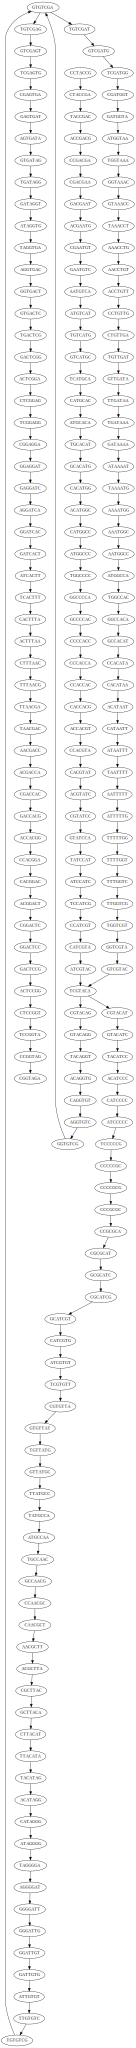

In [273]:
# Helper function to visualize graphs
%dotstr utils.viz_graph(nodes, edges)

In [274]:
# Main assembly algorithm

def dfs_cycle(n, edges, visited, start_n, start_edge, start_point = False):   
    visited.append(n)
    if start_point:
        return dfs_cycle(start_edge[1], edges, visited, start_n, start_edge, False)
    for e in edges:
        if n == e[0] and e[1] == start_n:
            return start_edge
        elif n == e[0] and e[1] not in visited:
            return dfs_cycle(e[1], edges, visited, start_n, start_edge, False) 
    return None

def find_bridge(n, edges):
    adj_edges = []
    for e in edges: 
        if n == e[0]:
            adj_edges.append(e)
    if len(adj_edges) == 1: return adj_edges[0]
    for e in adj_edges:
        visited = []
        bridge = dfs_cycle(n, edges, visited, n, e, True)
        if bridge != None:
            return bridge
    return adj_edges[0]

def euler_path(n, edges):
    path =[]
    count = 0
    while len(edges)>0:
        bridge = find_bridge(n, edges)
        path.append(bridge)
        n = bridge[1]
        edges.remove(bridge)
        count+=1
    return path
    
    
def assemble_sequence(nodes, edges):
    assembled_sequence = ""
    # Your code here
    visited = []
    start_n = ''
    child_n = set()
    for e in edges:
        child_n.add(e[1])
    for n in nodes:
        if n not in child_n:
            start_n = n
    seq = euler_path(start_n, edges)
    assembled_sequence = seq[0][0]
    for tup in seq:
        assembled_sequence += tup[1][-1]
    return assembled_sequence
# nodes_test = ['a', 'b', 'c', 'd']
# edges_test = [('b','a'), ('a','c'), ('c','b'), ('b', 'd')]
# print("HI")
# s = assemble_sequence(nodes_test, edges_test)
# print('result')
# print(s)

In [275]:
# Output assembled sequence
# Hint: Sequence is 200 nucleotides long

assmebled_seq = assemble_sequence(nodes, edges)
print(assmebled_seq)
print(len(assmebled_seq))

CCTACCGACGAATGTCATGCACATGGCCCCACCACGTATCCATCGTACATCCCCCGCGCATCGTGTTATGCCAACGCTTACATAGGGGATTGTGTCGATGGTAAACCTGTTGATAAAATGGCCACATAATTTTTGGTCGTACAGGTGTCGAGTGATAGGTGACTCGGAGGATCACTTTAACGACCACGGACTCCGGTAGA
200


<div class="alert alert-success"> 
    
**Problem 6.** Which of the two assembly methods did you use for problem 5, and why? (Hint: consider how the costs scale with the number of reads.)
    
</div>

Answer: The assembly method we used was with the Brujin graph and Euler path. The reason why is because the redundancy of high coverage data is handled in a way that the nodes in the graph do not increase with the frequency. If there is more overlap between different reads, a Brujin graph is more optimal because we can represent the frequency of the k-mers in the graph and not increase the size of it. The time complexity depends on the number nodes and edges, reducing the size of the nodes leads to faster operations when scanning through teh graph. The Euler path is needed to assmble the genome from the Brujin graph.

## Part 2: Sequencing SARS-CoV-2 virus

Let's move on from TeleTubbies to real-world organisms. For this problem, you'll assemble a genome for a variant of the SARS-CoV-2 virus. You're given reads from <i>actual</i> genome sequencing runs in the provided `SARS-CoV2.fastq` file. The file is based on the first Covid genome that was submitted on 5 January 2020: [https://www.ncbi.nlm.nih.gov/nuccore/NC_045512](https://www.ncbi.nlm.nih.gov/nuccore/NC_045512) But, you should be reconstructing a sequence from the provided reads without looking at the source sequence.

<div class="alert alert-success">
    
**Problem 7.**  Reconstruct the SATS-CoV2 genome from the provided sequence reads using $k=25$. 
    
</div>

You can re-use your implementation from Problem 5 and simply run it on the new data (depending on what you did for Problem 5, that might be enough to solve this problem). 

Print out your reconstructed sequence to a file `output.txt` (and add this file to the repo you submit). For this part, we will still assume that all the reads are error-free. 

In [276]:
# Read sequence reads
sequence_reads_covid, qualities_covid = utils.read_fastq('SARS-CoV2.fastq')
#print(sequence_reads_covid)

In [277]:
# Read reads into graph
nodes_covid, edges_covid = build_graph(sequence_reads_covid)
#print(is_connected(nodes_covid, edges_covid))

In [278]:
# Call main assembly algorithm
assmebled_covid_seq = assemble_sequence(nodes_covid, edges_covid)

In [279]:
# Write assembled sequence to file
with open("output.txt", "w") as f:
    f.write(assmebled_covid_seq)

# Part 3: Error-Aware Assembly (Challenge Problem)

<div class="alert alert-warning">
    This problem is a "Challenge Problem". This means it is a problem of unknown difficulty that might be quite challenging (unlike the earlier problems, we don't have a reference solution for this one, or a clear idea how hard it might be). We do hope all students will at least attempt this and that more ambitious students will work hard to solve it and learn interesting things by the attempt (whether or not it is successful), but not get frustrated if you can't get to the desired answer.  As a "Challenge Problem" it means that you shouldn't be worried if you are not able to solve this, though, and you can get full expected credit on this assignment without answering it.
</div>


In the parts above, we assumed error-free reads while assembling $k$-mers. As much as we'd like that, actual reads can (and do) have errors, captured by their Phred scores. 

For this question, you're given raw, actual reads from sequencing runs. Download the reads from this file:
https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11528307/ABS2-LN-R1_cleaned_paired.fastq.gz.  


<div class="alert alert-success">
    
**Problem 8 (Challenge).** Give the reads in the linked fastq file above, including their Phred33 quality score, assemble the most likely genome. Your solution should output the assembled sequence in `challenge.txt`. Provide a brief explantion of how your algorithm works and interesting things you learned in developing it.
    
</div>
    
This is an open-ended question. You are free to use any approach to deal with the issue. Make sure you provide your code, along with any assumptions you may have.

_Write a description of your algorithm, and things you learned from working on this here._

Based on their Phread33 quality score, one apporoach is putting a threshold to create the genome; essentially, if the score is above a certain threshold, then we will include it when assmbling the genome. The threshold is determined by taking the average error rate and finding the standard deviation. The genomes that are the top 68% of smallest error rates will be used. We can use the same Brujin graph and Eulerian path assembly to create the genome. The challenge will be dealing with reads that have no overlap with other reads. We're also not guaranteed full coverage on the graph, so we might end up with an invalid de Brujin graph that will not have a Eulerian path. Below is our attempt. The code is to determine if a Eularian path exists in the graph.


In [ ]:
def dfs(n, edges, visited):
    visited.append(n)
    for e in edges:
        if n == e[0] and e[1] not in visited:
            dfs(e[1], edges, visited)
def is_connected(nodes, edges):
    visited = []
    for n in nodes:
        exist = True
        for e in edges:
            if n in e[1]:
                exist = False
                break
        if exist: 
            dfs(n, edges, visited)
            break

                        
    #print(visited)
    for n in nodes:
        if n not in visited:
            print(n)
            return False     
    return True


# print(is_connected(nodes_test, edges_test))
print(is_connected(nodes, edges))

def is_connected_edge(n, e):
    visited = []
    for n in nodes:
        exist = True
        for e in edges:
            if n in e[1]:
                exist = False
                break
        if exist: 
            dfs(n, edges, visited)
            break

                        
    #print(visited)
    for n in nodes:
        if n not in visited:
            print(n)
            return False     
    return True


   <div class="alert alert-block alert-danger">
    <center>
        
 **Remember to follow the submission directions above to submit your assignment by 4:59pm on Tuesday, 8 February.**
    
 </center>
 </div>